In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [101]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   sex       891 non-null    int32  
 7   cabin     891 non-null    int32  
 8   embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [99]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,cabin,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,53.639731,1.536476
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,23.568293,0.791503
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,47.000000,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,47.000000,2.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,47.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,146.000000,2.000000


In [68]:
columns = train_data.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [70]:
train_data["Age"].fillna(np.mean(train_data.Age),inplace = True)
train_data["Cabin"].fillna(train_data.Cabin.mode()[0],inplace = True)
train_data["Embarked"].fillna(train_data.Embarked.mode()[0],inplace = True)

In [71]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [72]:
test_data["Age"].fillna(np.mean(test_data.Age),inplace = True)
test_data["Fare"].fillna(test_data.Fare.mode()[0],inplace = True)
test_data["Cabin"].fillna(test_data.Cabin.mode()[0],inplace = True)

In [73]:
lb = LabelEncoder()
train_data["sex"] = lb.fit_transform(train_data.Sex)
train_data["cabin"] = lb.fit_transform(train_data.Cabin)
train_data["embarked"] = lb.fit_transform(train_data.Embarked)

<AxesSubplot: >

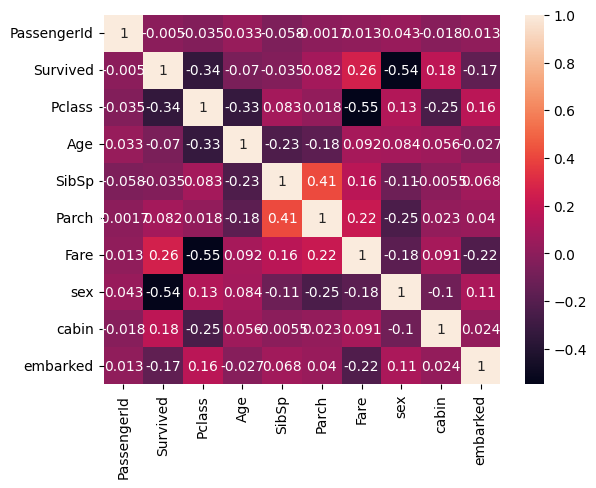

In [74]:
sns.heatmap(train_data.corr(),annot=True)

In [75]:
train_data.drop(["PassengerId","Sex","Ticket","Name","Cabin","Embarked"],axis=1,inplace=True)

In [76]:
x = train_data.drop("Survived",axis = 1).values
y = train_data.Survived.values

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

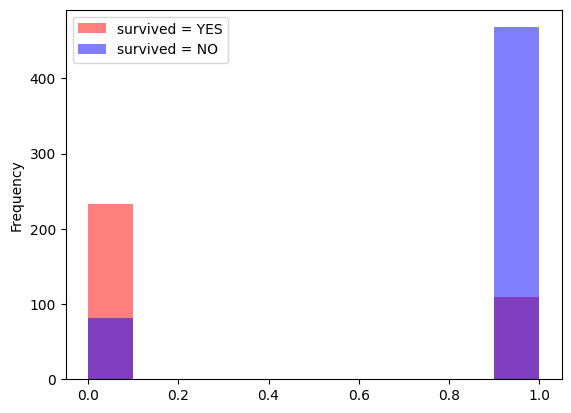

In [78]:
train_data[train_data["Survived"]==1]["sex"].plot.hist(color="red",alpha=0.5,label="survived = YES")
train_data[train_data["Survived"]==0]["sex"].plot.hist(color="blue",alpha=0.5,label="survived = NO")
plt.legend()
plt.show()

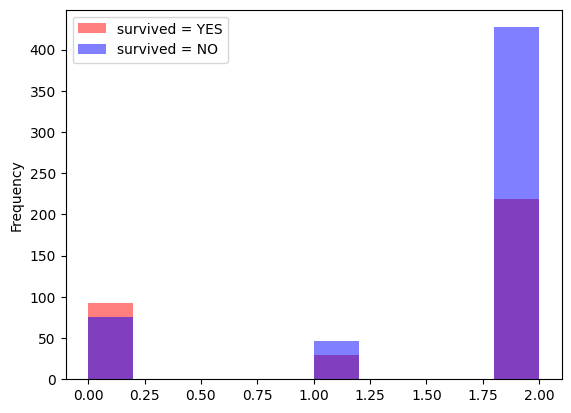

In [79]:
train_data[train_data["Survived"]==1]["embarked"].plot.hist(color="red",alpha=0.5,label="survived = YES")
train_data[train_data["Survived"]==0]["embarked"].plot.hist(color="blue",alpha=0.5,label="survived = NO")
plt.legend()
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Fare'>

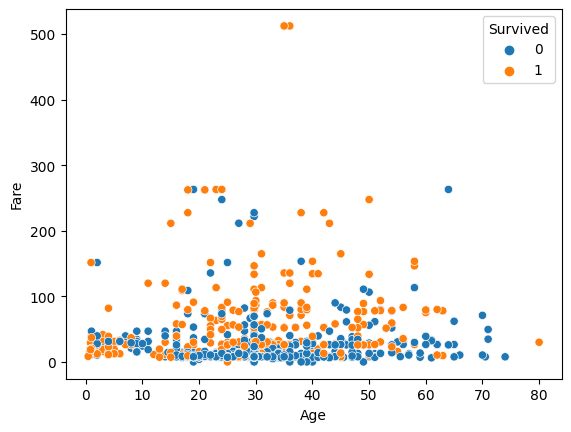

In [80]:
sns.scatterplot(train_data,x=train_data["Age"],y=train_data["Fare"],hue="Survived")

<AxesSubplot: xlabel='Age', ylabel='Survived'>

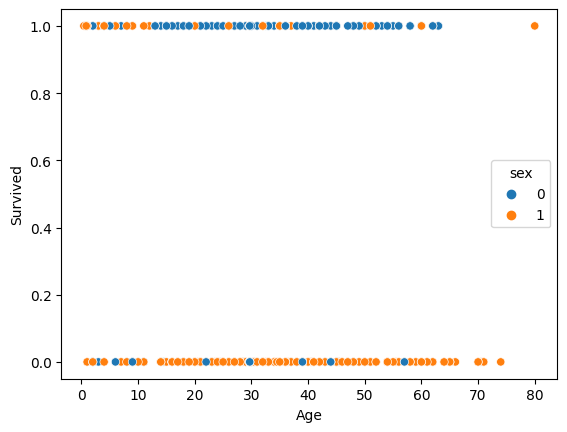

In [81]:
sns.scatterplot(train_data,x=train_data["Age"],y=train_data["Survived"],hue="sex")

<AxesSubplot: xlabel='Age', ylabel='cabin'>

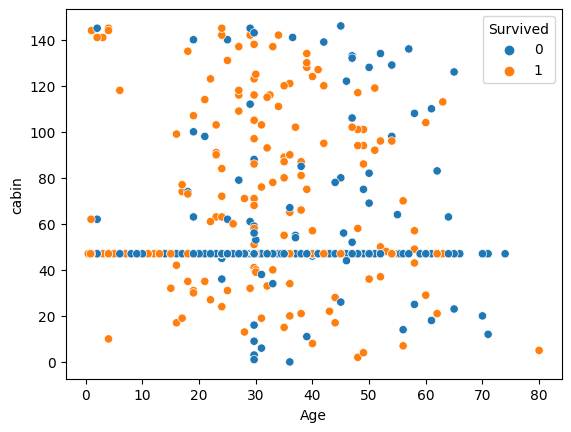

In [82]:
sns.scatterplot(data=train_data,x=train_data.Age,y = train_data.cabin,hue=train_data.Survived)

<AxesSubplot: xlabel='Age', ylabel='Count'>

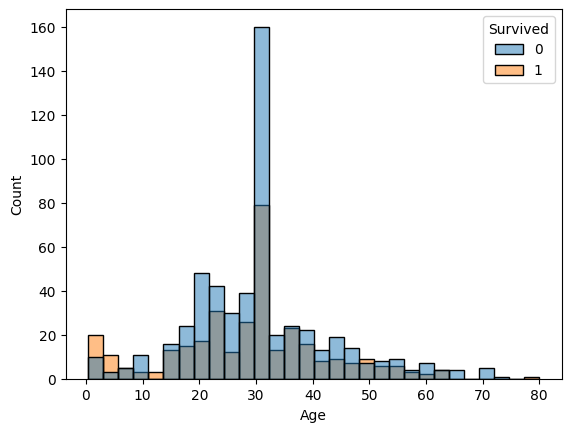

In [83]:
sns.histplot(data=train_data,x=train_data["Age"],hue="Survived")


<AxesSubplot: xlabel='embarked', ylabel='count'>

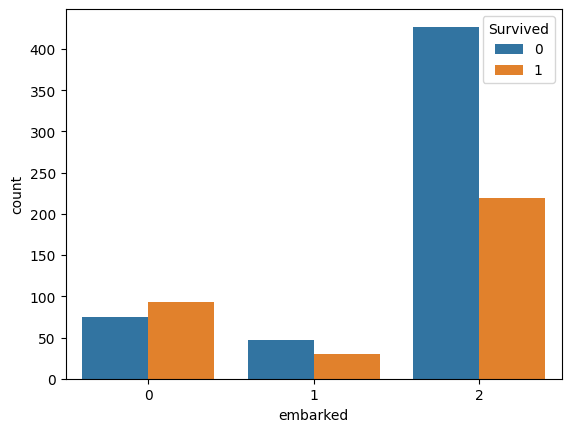

In [84]:
sns.countplot(data=train_data,x="embarked",hue="Survived")

In [131]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("The accuracy of SVm is:",accuracy_score(y_test,y_pred))

The accuracy of SVm is: 0.7040358744394619


<AxesSubplot: >

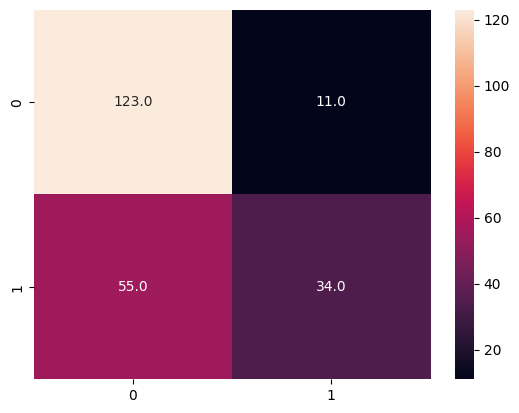

In [127]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.1f")

In [128]:
param_grid = { 
  'C': [0.1, 1, 10, 100, 1000], 
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train,y_train)
grid_pred = grid.predict(x_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.619 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.619 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.619 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.624 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.624 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.619 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.619 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.619 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.624 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.624 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.642 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 5/5] END .................C=1000, gamma=0.1;, score=0.654 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.754 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.739 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.737 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.782 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.784 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.843 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.724 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.737 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.759 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.761 total time=   0.0s
[CV 2/5] END ..............C

In [132]:
print("The accuracy of SVC after Hyper Parameter Tuning is:",accuracy_score(y_test,grid_pred))

The accuracy of SVC after Hyper Parameter Tuning is: 0.8116591928251121


<AxesSubplot: >

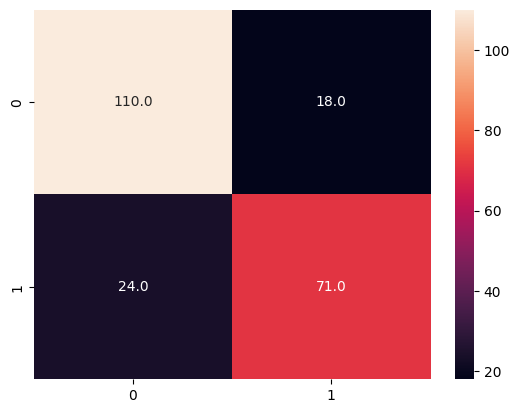

In [129]:
sns.heatmap(confusion_matrix(grid_pred,y_test),annot=True,fmt="0.1f")

In [113]:
lb = LabelEncoder()
test_data["sex"] = lb.fit_transform(test_data.Sex)
test_data["cabin"] = lb.fit_transform(test_data.Cabin)
test_data["embarked"] = lb.fit_transform(test_data.Embarked)

In [114]:
test_x = test_data.drop(["PassengerId","Sex","Ticket","Name","Cabin","Embarked"],axis=1)

In [115]:
test_x

,Pclass,Age,SibSp,Parch,Fare,sex,cabin,embarked
0,3,34.50000,0,0,7.8292,1,15,1
1,3,47.00000,1,0,7.0000,0,15,2
2,2,62.00000,0,0,9.6875,1,15,1
3,3,27.00000,0,0,8.6625,1,15,2
4,3,22.00000,1,1,12.2875,0,15,2
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,15,2
414,1,39.00000,0,0,108.9000,0,22,0
415,3,38.50000,0,0,7.2500,1,15,2
416,3,30.27259,0,0,8.0500,1,15,2


In [116]:
predict = model.predict(test_x.values)

In [117]:
solution=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predict})
output = solution.to_csv('submision.csv',index=False)